1. State in brief about the high-level idea of the dataset? What the dataset is about? Donot exceed more than 3 sentences

Answer: The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

2. Where did you find the dataset? Give specific link or source. State clearly if the dataset is collected from somehwere unsharable and why

Answer: This dataset is downloaded from a hackathon competition of Analytics Vidhya. Here is the link: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

3. What is the specific reason that you chose the dataset?

Answer: I found the problem statement very much relatable to our course plan. I think this can be helpful for learning data analysis. Also, this can be a challange for me to solve after completing this course to check how much I practiced and learnt.
The challange is to build a predictive model and predict the sales of each product at a particular outlet. I believe I can solve this.

This is the problem statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

4. How many rows and how many columns the dataset contains?

Answer: Number of Rows: 8523

Number of Columns: 12

5. What are the name of the columns? What each column means, state and explain clearly. If some column description is unclear to you, also state that.

Answer: Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

6. What is the data type of each column? Is it integer, float or string?

Answer: Item_Identifier: String

Item_Weight: Double

Item_Fat_Content: String

Item_Visibility: Double

Item_Type: String

Item_MRP: Double

Outlet_Identifier: String

Outlet_Establishment_Year: Integer

Outlet_Size: String

Outlet_Location_Type: String

Outlet_Type: String

Item_Outlet_Sales: Float

## Step 1: Exploratory Analysis on the train data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
df = pd.read_csv("D:\Data_Analysis\Market_train.csv")
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Problem Found: Same code is showing Filenotfounderror in google colab

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Count of Item weight is 7060 whereas others are the same as total row number. This means there are null values in this column.

In [7]:
df.describe(include=object).transpose()

,count,unique,top,freq
Item_Identifier,8523,1559,FDG33,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


Count of Outlet_size is 6113 whereas others are the same as total row number. This means there are null values in this column. 

And the Fat column has 5 unique values. Need to check.

In [8]:
df.Outlet_Location_Type.describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

Indian cities are classified as X (Tier 1), Y (Tier 2), and Z (Tier 3) categories by the Government of India, based on the population density of the city. In highly populated cities, people will have to pay more money to get goods and services. That is, the living expense will be greater.
Tier1 > Tier 2 > Tier 3  if I sort them according to life expenses, polpulation and other advantages.
But it will be reversed in case of number of cities of each type.

In [9]:
df.Item_MRP.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [10]:
df.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [11]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Need to replace the last three values.

In [14]:
df.replace('LF', "Low Fat", inplace=True)
df.replace('low fat', "Low Fat", inplace=True)
df.replace('reg', "Regular", inplace=True)

In [15]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
df.isnull().values.any()

True

That means I need to fill these missing values.

In [17]:
df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

This seems I guessed right. I need to check the data of these two columns.

In [18]:
df.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [19]:
df.Item_Weight.isnull().sum()

1463

In [20]:
df.Outlet_Size.describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [21]:
df.Outlet_Size.isnull().sum()

2410

In [22]:
print('The percentage of missing values in the Item_Weight variable is {0:.2f}%'.format(df.Item_Weight.isnull().sum()*100/df.shape[0]))

The percentage of missing values in the Item_Weight variable is 17.17%


In [23]:
print('The percentage of missing values in the Outlet_Size variable is {0:.2f}%'.format(df.Outlet_Size.isnull().sum()*100/df.shape[0]))

The percentage of missing values in the Outlet_Size variable is 28.28%


In [24]:
def fillmissing_numeric(table, col_name):
    table[col_name] = table[col_name].astype('float64')
    table[col_name].fillna(table[col_name].mean(), inplace=True)
    
def fillmissing_object(table, col_name):
    table[col_name] = table[col_name].astype('object')
    table[col_name].fillna(table[col_name].value_counts().idxmax(), inplace=True)

In [25]:
fillmissing_numeric(df, 'Item_Weight')
fillmissing_object(df, 'Outlet_Size')

In [26]:
df.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [27]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Step 2: Visualization of distribution


We will start with exploring of the Item_Outlet_Sales. We will see how the Item_Outlet_Sales is distributed.

In [28]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Text(0, 0.5, 'Number of entries in the range')

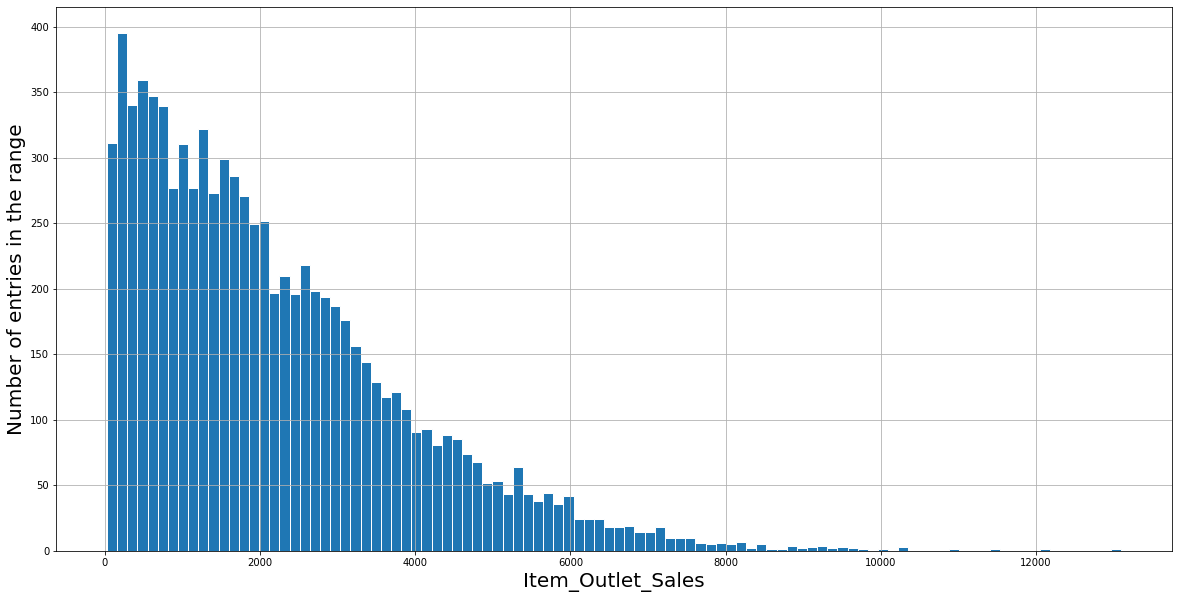

In [29]:
#Let's visualize
import matplotlib.pyplot as plt
%matplotlib inline
df['Item_Outlet_Sales'].hist(bins=100, figsize=(20, 10), edgecolor = 'white', range = [30, 13100]) #edgecolor ensures in-between bins, we have something different color as seperator
plt.xlabel('Item_Outlet_Sales', fontsize=20)
plt.ylabel('Number of entries in the range', fontsize=20)

The Item_Outlet_Sales distribution is highly skewed to right side. That means, most outlet sales are between 0 to 8000 rupees and may be some in between 10000 to 12000.

In [30]:
print('Item_Outlet_Sales less than or equal to 2000 rupees are {:.2f}% of the total data'.format(df[df.Item_Outlet_Sales<=2000].shape[0]*100/df.shape[0]))
      
print('Item_Outlet_Sales less than or equal to 4000 rupees are {:.2f}% of the total data'.format(df[df.Item_Outlet_Sales<=4000].shape[0]*100/df.shape[0]))

print('Item_Outlet_Sales less than or equal to 6000 rupees are {:.2f}% of the total data'.format(df[df.Item_Outlet_Sales<=6000].shape[0]*100/df.shape[0]))

print('Item_Outlet_Sales less than or equal to 8000 rupees are {:.2f}% of the total data'.format(df[df.Item_Outlet_Sales<=8000].shape[0]*100/df.shape[0]))

print('Item_Outlet_Sales less than or equal to 12000 rupees are {:.2f}% of the total data'.format(df[df.Item_Outlet_Sales<=12000].shape[0]*100/df.shape[0]))

Item_Outlet_Sales less than or equal to 2000 rupees are 54.76% of the total data
Item_Outlet_Sales less than or equal to 4000 rupees are 85.62% of the total data
Item_Outlet_Sales less than or equal to 6000 rupees are 96.61% of the total data
Item_Outlet_Sales less than or equal to 8000 rupees are 99.41% of the total data
Item_Outlet_Sales less than or equal to 12000 rupees are 99.98% of the total data


We will try to analyze Outlet_Type, Outlet_Location_Type

In [31]:
df['Outlet_Type'].value_counts()*100/len(df)

Supermarket Type1    65.434706
Grocery Store        12.706793
Supermarket Type3    10.970316
Supermarket Type2    10.888185
Name: Outlet_Type, dtype: float64

Most of the outlets, in this case 65% of them are Supermarket Type1 type. Others are sort of equal with a percentage of 10 to 12%. 

In [32]:
df['Outlet_Location_Type'].value_counts()*100/len(df)

Tier 3    39.305409
Tier 2    32.676288
Tier 1    28.018303
Name: Outlet_Location_Type, dtype: float64

Outlets on Tier 3 are the highest of number, with 39%, then Tier 2 with 32% and then Tier 3 with 28%

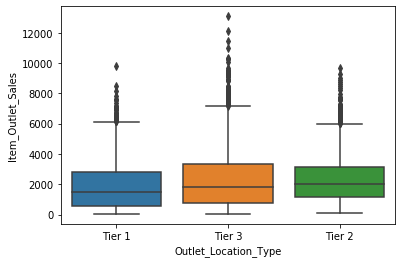

In [33]:
import seaborn as sns
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.show()

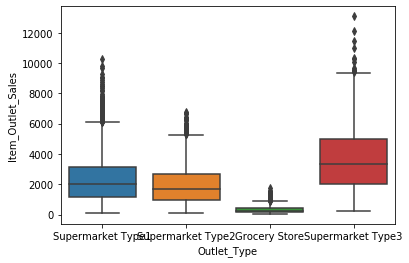

In [34]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.show()

In [35]:
#correlation between all the variables
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


We can see here, there's no visible correlation, just a slight relation between Item_MRP and Item_Outlet_Sales. Just for visualization, next block is shown.

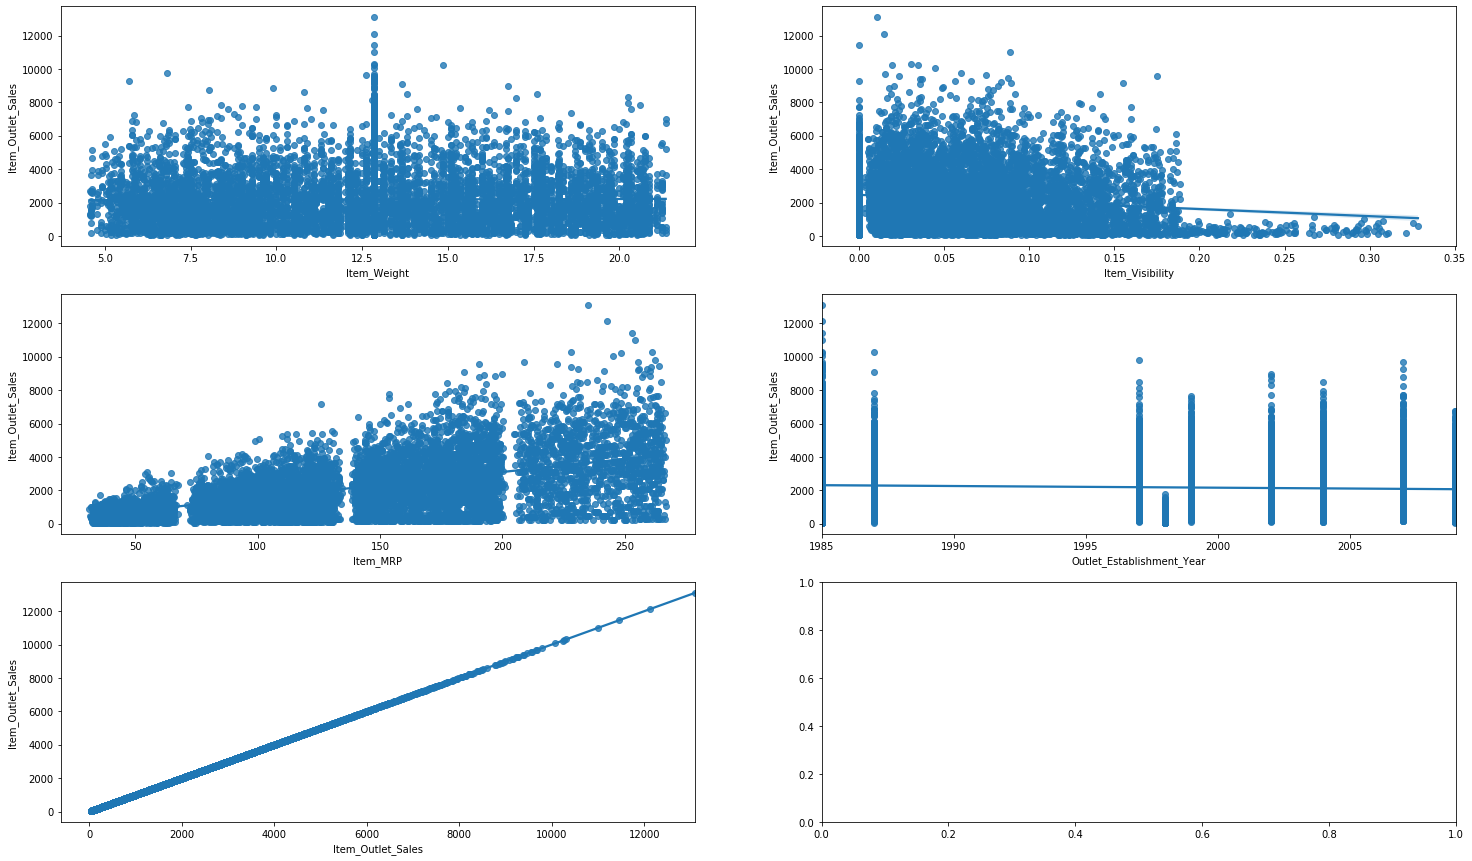

In [36]:
# Visulaize all correlations

col_dtypes = df.dtypes.tolist()
numeric_cols = [df.columns[idx] for idx, col_type in enumerate(col_dtypes) if col_type=='int64' or col_type=='float64']
df_numerics = df[numeric_cols]
f, axes = plt.subplots(3,2)
f.set_figheight(15)
f.set_figwidth(25)
col_idx = 0
for i in range(3):
    for j in range(2):
        x = numeric_cols[col_idx]
        sns.regplot(x, y="Item_Outlet_Sales", data=df_numerics, ax=axes[i][j])
        col_idx += 1
        if(col_idx>=5):
            break


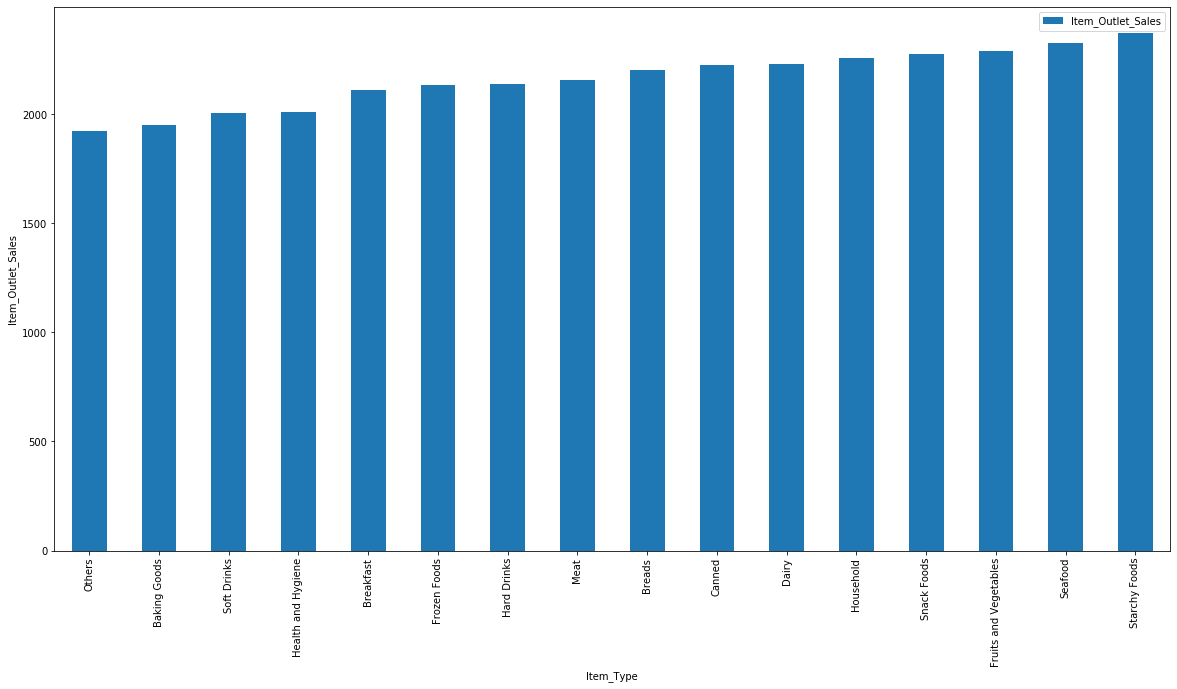

In [37]:
# visualizing the average Item_Outlet_Sales of the items for different Item_Types
mean_Item_Outlet_Sales = df[['Item_Type', 'Item_Outlet_Sales']].groupby('Item_Type').mean()
mean_Item_Outlet_Sales.sort_values(by='Item_Outlet_Sales', ascending=True, inplace=True)
mean_Item_Outlet_Sales.plot(kind='bar', figsize=(20,10))
plt.ylabel('Item_Outlet_Sales')
plt.show()

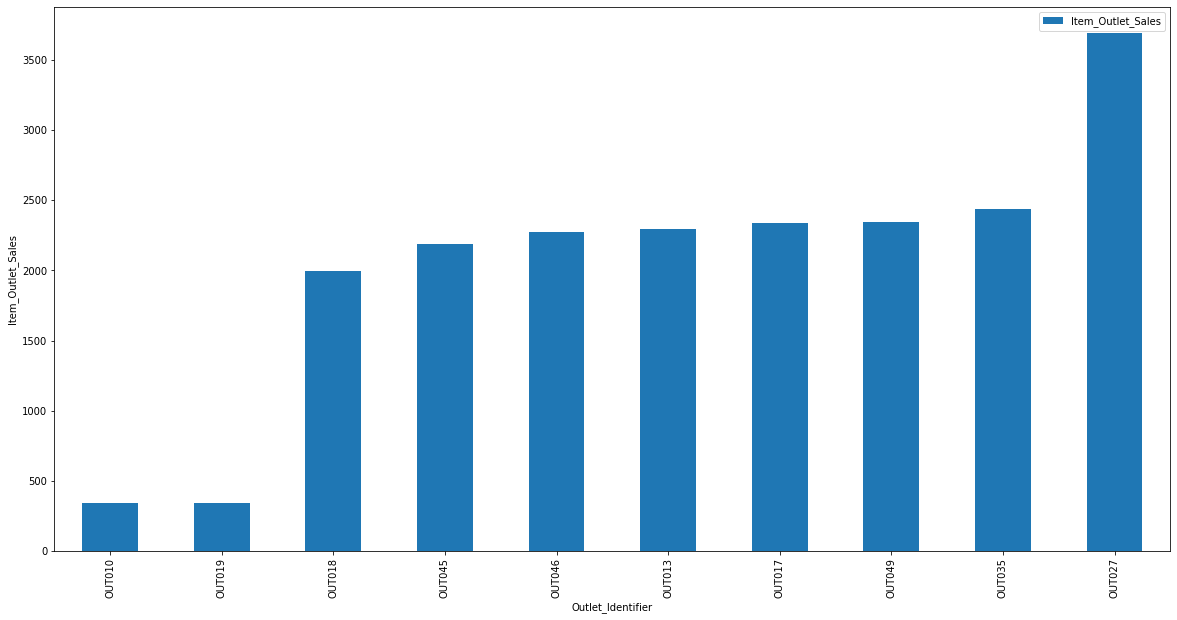

In [38]:
# visualizing the average Outlet_Identifier of the items for different Item_Types
mean_Item_Outlet_Sales = df[['Outlet_Identifier', 'Item_Outlet_Sales']].groupby('Outlet_Identifier').mean()
mean_Item_Outlet_Sales.sort_values(by='Item_Outlet_Sales', ascending=True, inplace=True)
mean_Item_Outlet_Sales.plot(kind='bar', figsize=(20,10))
plt.ylabel('Item_Outlet_Sales')
plt.show()

## Step 3: Prediction Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
model_base = LinearRegression()

In [41]:
# make the trainable set of data
data_X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
data_Y = df['Item_Outlet_Sales']

In [42]:
model_base.fit(data_X, data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model_base.coef_

array([-1.86497927e+00, -4.38447255e+03,  1.55599012e+01, -1.26267382e+01])

In [44]:
Prediction = model_base.predict(data_X)
Actual = data_Y

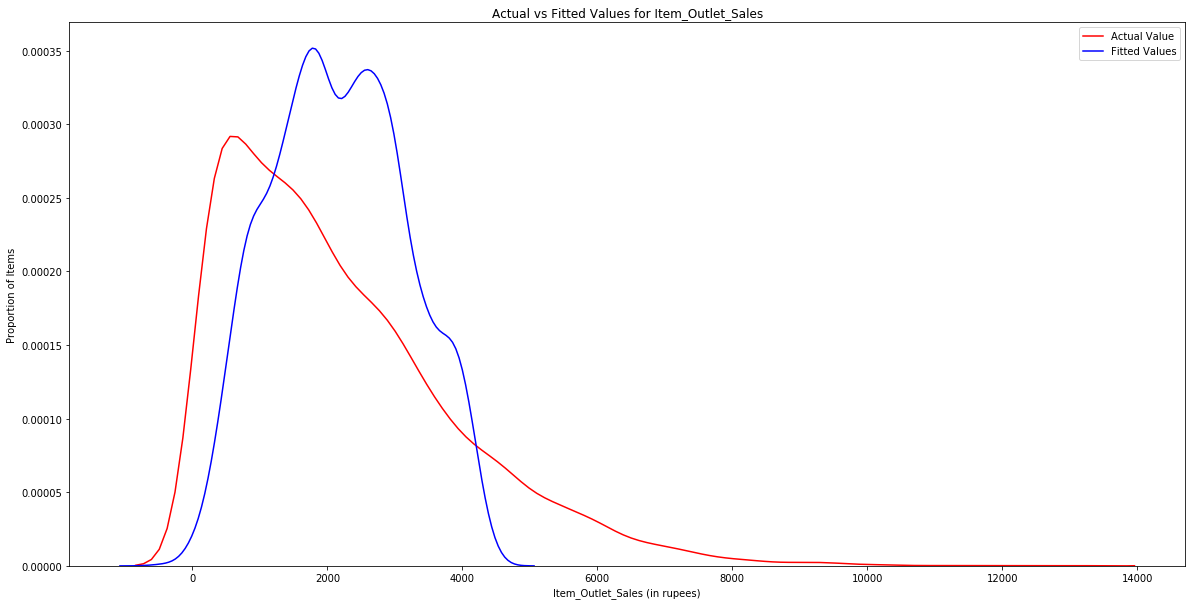

In [45]:
#comparison
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
sns.distplot(Prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales (in rupees)')
plt.ylabel('Proportion of Items')

plt.show()
plt.close()

Not a good one!
Let's take a look at the MSE and R-squared error.

In [46]:
mean_squared_error(Actual, Prediction)

1915017.1317067968

In [47]:
r2_score(Actual, Prediction)

0.3423251529808904

### Let's try another one

In [48]:
col_dtypes = df.dtypes.tolist()
categorical_cols = [df.columns[idx] for idx, col_type in enumerate(col_dtypes) if col_type=='O']
df_categorical = pd.get_dummies(df[categorical_cols])
df_categorical

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [49]:
numeric_cols = [df.columns[idx] for idx, col_type in enumerate(col_dtypes) if col_type=='int64' or col_type=='float64']
df_numerics = df[numeric_cols]
df_numerics.drop('Item_Outlet_Sales', axis=1, inplace=True)
df_numeric_scaled = (df_numerics-df_numerics.mean())/(df_numerics.std())

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
data_X = pd.concat([df_categorical, df_numeric_scaled], axis=1)
data_X

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,-0.841822,-0.970675,1.747351,0.139533
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,-1.641610,-0.908058,-1.488936,1.334024
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.098490,-0.956861,0.010040,0.139533
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1.500750,-1.281683,0.660011,0.020083
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,-0.929373,-1.281683,-1.399138,-1.293858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,-1.418000,-0.181183,1.180714,-1.293858
8519,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,-1.059516,-0.371132,-0.527270,0.497880
8520,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,-0.534212,-0.599749,-0.897155,0.736779
8521,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,-1.336365,1.532790,-0.607941,1.334024


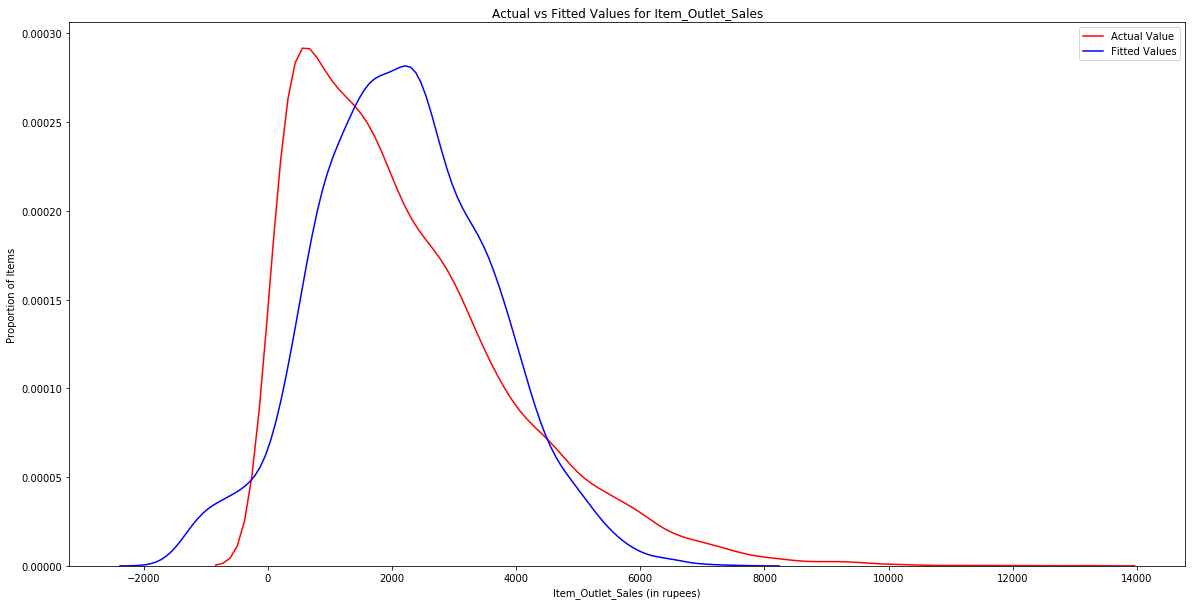

In [51]:
model_02 = LinearRegression()
data_Y = df['Item_Outlet_Sales']
model_02.fit(data_X, data_Y)
Prediction = model_02.predict(data_X)
Actual = data_Y

#comparison
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
sns.distplot(Prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales (in rupees)')
plt.ylabel('Proportion of Items')

plt.show()
plt.close()

In [52]:
r2_score(Actual, Prediction)

0.6360817726620266

In [53]:
mean_squared_error(Actual, Prediction)

1059656.8244191012

It's better than the previous one, but still not the best. 